In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('./data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Dataset : Credit Card Fraud Detection Data
1. 28개의 컬럼으로 구성
2. 타겟변수는 Class (0, 1: 이진분류)

In [5]:
# 결측값 여부 확인
data.isnull().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [6]:
print('rows: ', data.shape[0], 'columns: ', data.shape[1])

rows:  284807 columns:  29


In [8]:
# 기본통계량
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [10]:
# 종속변수의 분포확인
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

### EDA(Exploratory Data Analysis) 수행

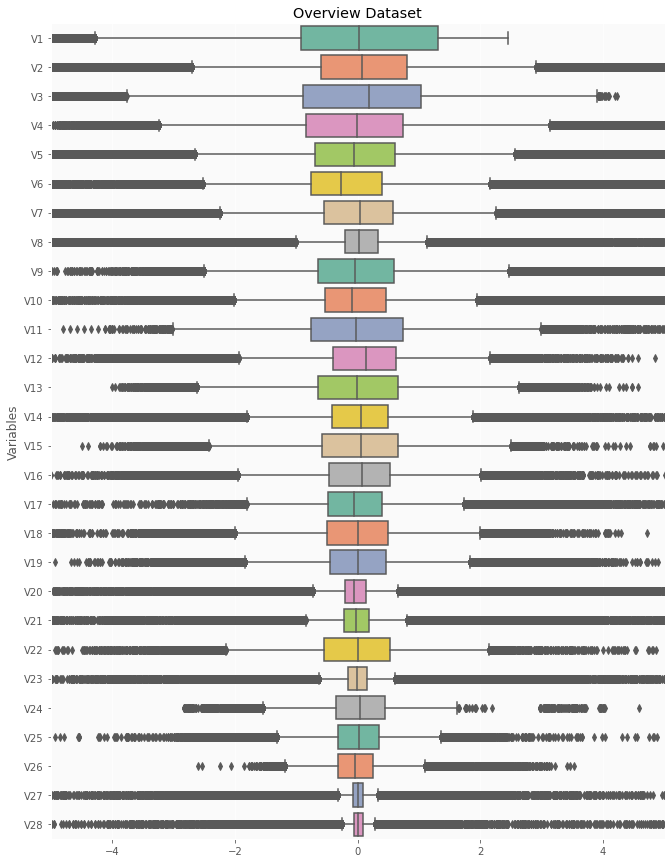

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(11,15)) # 그래프 사이즈

ax.set_facecolor('#fafafa') # 그래프 색상값
ax.set(xlim = (-5, 5)) # X축 범위
plt.ylabel('Variables') # Y축 이름
plt.title('Overview Dataset') # 그래프 제목
ax = sns.boxplot(data = data.drop(columns=['Class']), # V1 - V28 확인
                 orient = 'h',
                 palette= 'Set2')

### 클래스별 각 변수의 분포 시각화

<Figure size 432x288 with 0 Axes>

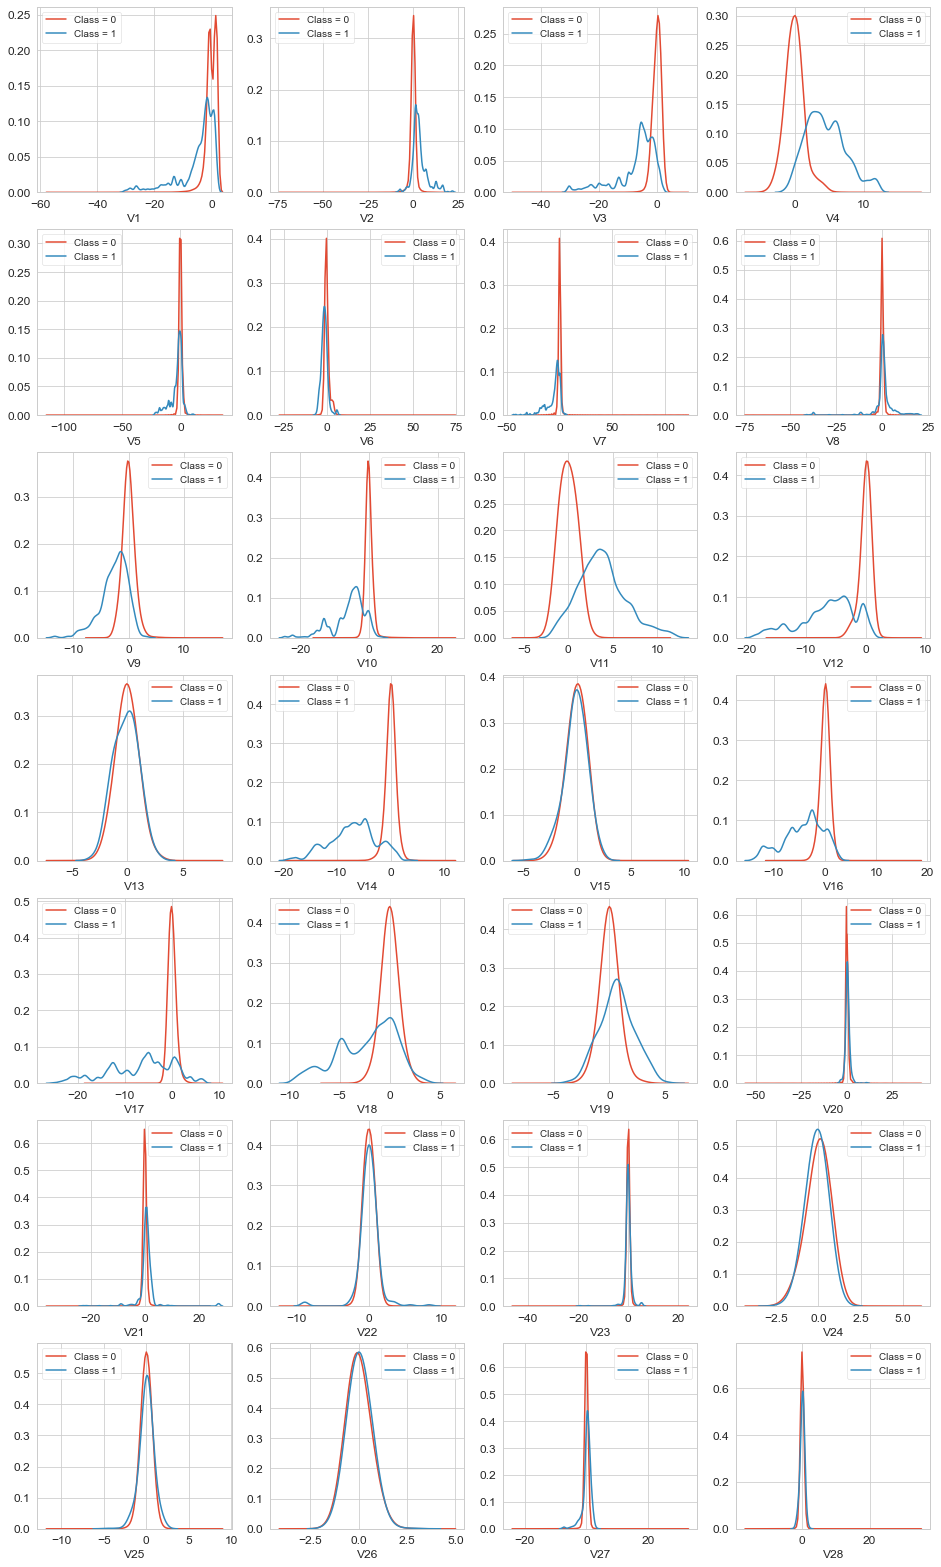

In [13]:
var = data.columns.values[:-1] # V1 ~ V28

i = 0
t0 = data.loc[data['Class'] == 0] # Class = 0 인 행만 추출
t1 = data.loc[data['Class'] == 1] # Class = 1 인 행만 추출

sns.set_style('whitegrid') 
plt.figure()
fig, ax = plt.subplots(8, 4, figsize=(16,28)) # 축 지정

for feature in var:
    i += 1
    plt.subplot(7, 4, i) # 28개의 그래프
    sns.kdeplot(t0[feature], bw=0.5, label='Class = 0')
    sns.kdeplot(t1[feature], bw=0.5, label='Class = 1')
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [15]:
"""
1. 타겟변수에 대해 분포차이가 많이나는 변수: V4, V11
2. 타겟변수에 대해 분포차이가 비교적 많이 존재하는 변수: V12, V14, V18
3. 타겟변수에 대해 분포차이가 비교적 적게 존재하는 변수: V1, V2, V3, V10
※ 4. 그러나, Class 0 은 284315개의 데이터에 관한 분포 Class 1은 492 개의 데이터에 관한 분포로써 Class Imbalanced Problem으로 
분포형태 유사성을 완전히 판단하기 어려움.
"""

'\n1. 타겟변수에 대해 분포차이가 많이나는 변수: V4, V11\n2. 타겟변수에 대해 분포차이가 비교적 많이 존재하는 변수: V12, V14, V18\n3. 타겟변수에 대해 분포차이가 비교적 적게 존재하는 변수: V1, V2, V3, V10\n※ 4. 그러나, Class 0 은 284315개의 데이터에 관한 분포 Class 1은 492 개의 데이터에 관한 분포로써 Class Imbalanced Problem으로 \n분포형태 유사성을 완전히 판단하기 어려움.\n'

In [17]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print("shape of X: {}".format(X.shape))
print("shape of Y: {}".format(y.shape))

shape of X: (284807, 28)
shape of Y: (284807, 1)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Number transactions X_train dataset: ', X_train.shape)
print('Number transactions y_train dataset: ', y_train.shape)
print('Number transactions X_test dataset: ', X_test.shape)
print('Number transactions y_test dataset: ', y_test.shape)

Number transactions X_train dataset:  (227845, 28)
Number transactions y_train dataset:  (227845, 1)
Number transactions X_test dataset:  (56962, 28)
Number transactions y_test dataset:  (56962, 1)


In [19]:
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_score = (2 * Recall * Precision) / (Recall + Precision)
    
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1_score: ", F1_score)

### 불균형 데이터셋에 분류기 적용

In [23]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

# 학습/평가데이터를 XGBoost 모델에 맞게 변환
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train), label = pd.DataFrame(y_train))

lgb_param = {'max_depth': 10, 
             'learning_rate': 0.01,
             'n_estimators': 50, 
             'objective': 'multiclass',
             'num_class': len(set(pd.DataFrame(y_train)))+1}

lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain)
lgb_model_predict = np.argmax(lgb_model.predict(X_test), axis=1) # Softmax 결과값 중 최대값의 Label로 반환
model_evaluation(y_test, lgb_model_predict)

c:\anaconda3\envs\fastcampus_ml\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 28
[LightGBM] [Info] Start training from score -0.001718
[LightGBM] [Info] Start training from score -6.367713
Accuracy:  0.9991748885221726
Precision:  0.921875
Recall:  0.5841584158415841
F1_score:  0.7151515151515151


### SMOTE 적용해서 Over-sampling 수행

In [24]:
!pip install imblearn

In [25]:
from imblearn.over_sampling import SMOTE

In [27]:
print("Before Oversampling. Counts of label '0': {}".format(sum(y_train ==0)))
print("Before Oversampling. Counts of label '1': {}".format(sum(y_train ==1)))

Before Oversampling. Counts of label '0': [227454]
Before Oversampling. Counts of label '1': [391]


In [35]:
sm = SMOTE(random_state=42, sampling_strategy=0.3)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [36]:
print("After Oversampling. Counts of label '0': {}".format(sum(y_train_res == 0)))
print("After Oversampling. Counts of label '1': {}".format(sum(y_train_res == 1)))

After Oversampling. Counts of label '0': 227454
After Oversampling. Counts of label '1': 68236


### 불균형 데이터셋에 SMOTE 수행 후 분류기 적용

In [37]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

# 학습/평가데이터를 XGBoost 모델에 맞게 변환
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res))

lgb_param = {'max_depth': 10, 
             'learning_rate': 0.01,
             'n_estimators': 50, 
             'objective': 'multiclass',
             'num_class': len(set(pd.DataFrame(y_train_res)))+1}

lgb_model2 = lgb.train(params = lgb_param, train_set = lgb_dtrain)
lgb_model_predict2 = np.argmax(lgb_model2.predict(X_test), axis=1) # Softmax 결과값 중 최대값의 Label로 반환
model_evaluation(y_test, lgb_model_predict2)

c:\anaconda3\envs\fastcampus_ml\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023682 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.466339
Accuracy:  0.9990695551420246
Precision:  0.6967213114754098
Recall:  0.8415841584158416
F1_score:  0.7623318385650223


In [ ]:
# SMOTE 적용 후 학습한 결과 모델의 성능이 올라감

### 1:1 로 over-sampling 하여 분류기 학습

In [38]:
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
print("After Oversampling. Counts of label '0': {}".format(sum(y_train_res == 0)))
print("After Oversampling. Counts of label '1': {}".format(sum(y_train_res == 1)))

After Oversampling. Counts of label '0': 227454
After Oversampling. Counts of label '1': 227454


In [39]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb

# 학습/평가데이터를 XGBoost 모델에 맞게 변환
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res))

lgb_param = {'max_depth': 10, 
             'learning_rate': 0.01,
             'n_estimators': 50, 
             'objective': 'multiclass',
             'num_class': len(set(pd.DataFrame(y_train_res)))+1}

lgb_model3 = lgb.train(params = lgb_param, train_set = lgb_dtrain)
lgb_model_predict3 = np.argmax(lgb_model3.predict(X_test), axis=1) # Softmax 결과값 중 최대값의 Label로 반환
model_evaluation(y_test, lgb_model_predict3)

c:\anaconda3\envs\fastcampus_ml\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038675 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 454908, number of used features: 28
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Info] Start training from score -0.693147
Accuracy:  0.9835855482602437
Precision:  0.08794466403162056
Recall:  0.8811881188118812
F1_score:  0.15992812219227312


In [40]:
# Precision 값이 현저히 낮아져서 F1 score도 낮아지는데, 학습데이터에 과적합된 것이 원인이라고 생각됨

### BLSM(Borderline SMOTE) 적용 후 비교

In [41]:
from imblearn.over_sampling import BorderlineSMOTE
sm4 = BorderlineSMOTE(random_state=42, sampling_strategy=0.3) # BLSM 알고리즘 적용
X_train_res4, y_train_res4 = sm4.fit_sample(X_train, y_train.ravel())

In [42]:
# 학습/평가데이터를 XGBoost 모델에 맞게 변환
lgb_dtrain = lgb.Dataset(data = pd.DataFrame(X_train_res4), label = pd.DataFrame(y_train_res4))

lgb_param = {'max_depth': 10, 
             'learning_rate': 0.01,
             'n_estimators': 50, 
             'objective': 'multiclass',
             'num_class': len(set(pd.DataFrame(y_train_res4)))+1}

lgb_model4 = lgb.train(params = lgb_param, train_set = lgb_dtrain)
lgb_model_predict4 = np.argmax(lgb_model4.predict(X_test), axis=1) # Softmax 결과값 중 최대값의 Label로 반환
model_evaluation(y_test, lgb_model_predict4)

c:\anaconda3\envs\fastcampus_ml\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022750 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 295690, number of used features: 28
[LightGBM] [Info] Start training from score -0.262364
[LightGBM] [Info] Start training from score -1.466339
Accuracy:  0.9984199992977775
Precision:  0.5369127516778524
Recall:  0.7920792079207921
F1_score:  0.64


In [44]:
"""
이론적으로는 BLSM이 더 좋아보이지만, 적용데이터에서는 BLSM 보다 기본 SMOTE가 모델의 성능이 좋음
"""

'\n이론적으로는 BLSM이 더 좋아보이지만, 적용데이터에서는 BLSM 보다 기본 SMOTE가 모델의 성능이 좋음\n'

In [ ]:
### 